# Predicting Boston Housing Price Using Regression Models

## Gather Data
[Source Original Research Paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

[Dataset url](http://lib.stat.cmu.edu/datasets/boston)

## Importing And Understanding The Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
values = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
price = raw_df.values[1::2, 2]

In [2]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

In [3]:
# truning new values array into a dataframe
values = pd.DataFrame(data= values, columns=features)
values.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [4]:
# turning price into a dataframe
price = pd.DataFrame(data=price, columns=['PRICE'])
price.head() # price in $1000's

PRICE
0   24.0
1   21.6
2   34.7
3   33.4
4   36.2

In [5]:
# merging data and target into a new dataframe
data = pd.concat([values, price], axis=1)
data.head() # displaying the top 5 rows

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [6]:
data.tail() # displaying the bottom 5 rows

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [7]:
data.count() # display the number of row

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

In [8]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [9]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [10]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [11]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Vizualizing The Data

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


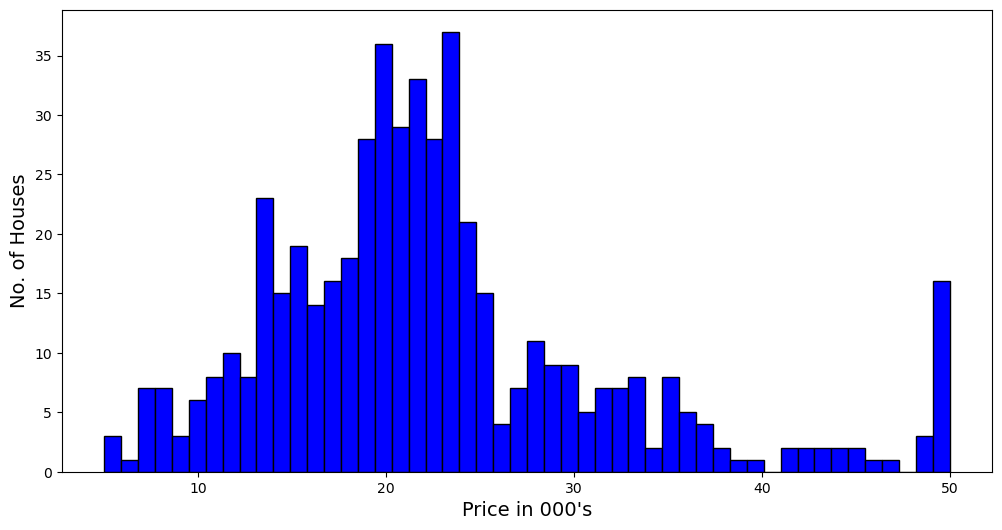

In [13]:
plt.figure(figsize=(12,6))
plt.hist(data['PRICE'], bins=50, color='blue', ec='black')
plt.xlabel("Price in 1000's",  fontsize=14)
plt.ylabel("No. of Houses",  fontsize=14)
plt.show()

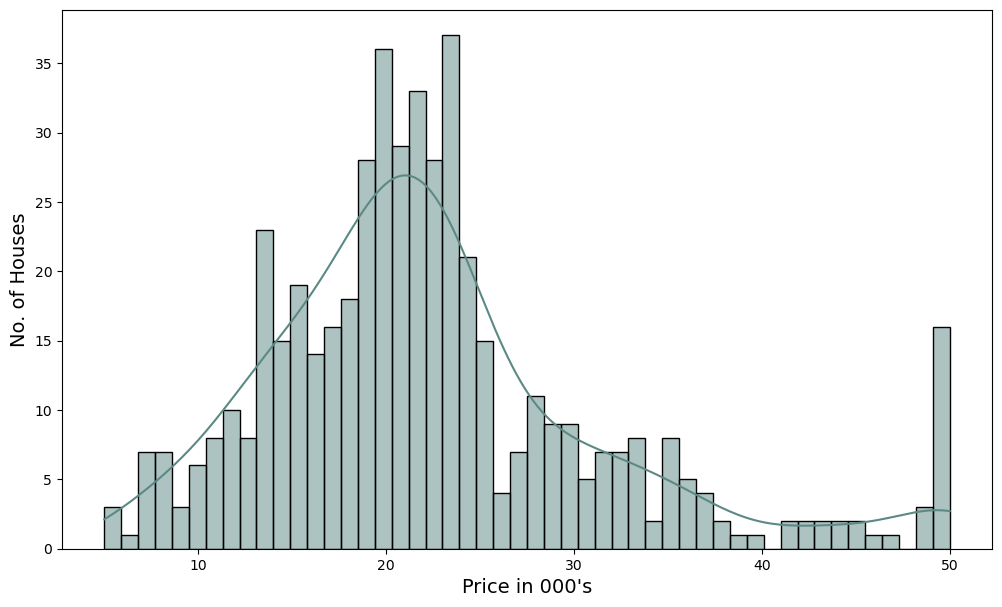

In [14]:
plt.figure(figsize=(12,7))
sns.histplot(data['PRICE'], bins=50, kde=True, color='#5C8984')
plt.xlabel("Price in 1000's",  fontsize=14)
plt.ylabel("No. of Houses",  fontsize=14)
plt.show()

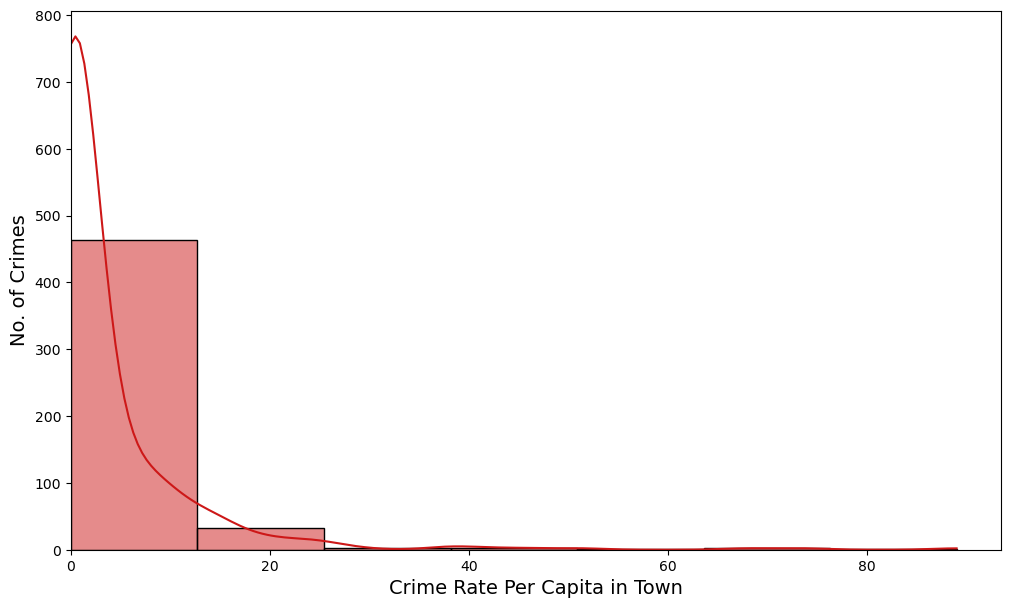

In [15]:
plt.figure(figsize=(12,7))
sns.histplot(data['CRIM'], bins=7, kde=True, color='#CD1818')
plt.xlim(0)
plt.ylim(0)
plt.xlabel("Crime Rate Per Capita in Town", fontsize=14)
plt.ylabel("No. of Crimes", fontsize=14)
plt.show()

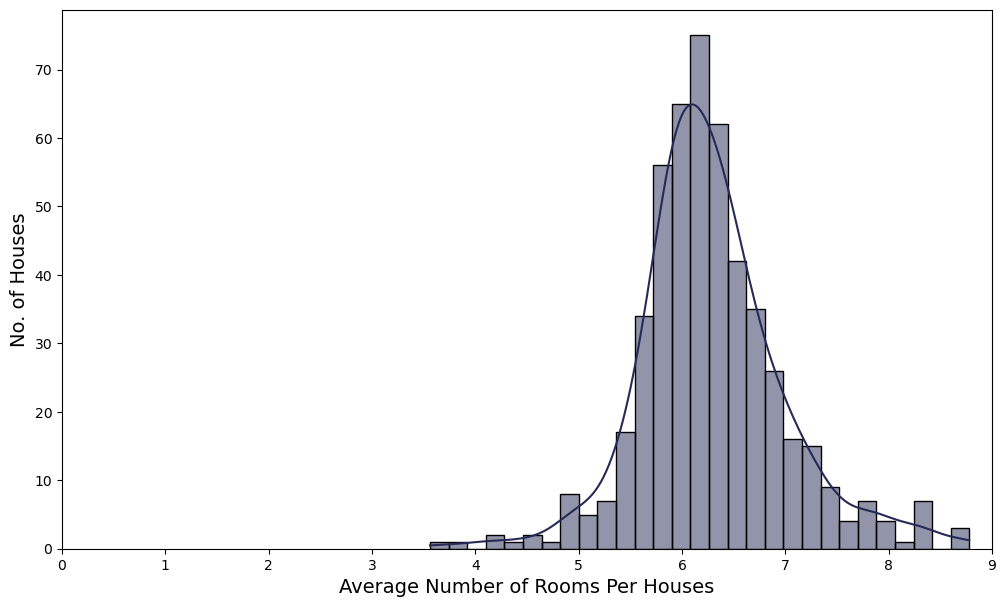

In [16]:
plt.figure(figsize=(12,7))
sns.histplot(data['RM'],  kde=True, color='#262A56')
plt.xlim(0,9)
plt.ylim(0)
plt.xlabel("Average Number of Rooms Per Houses", fontsize=14)
plt.ylabel("No. of Houses", fontsize=14)
plt.show()

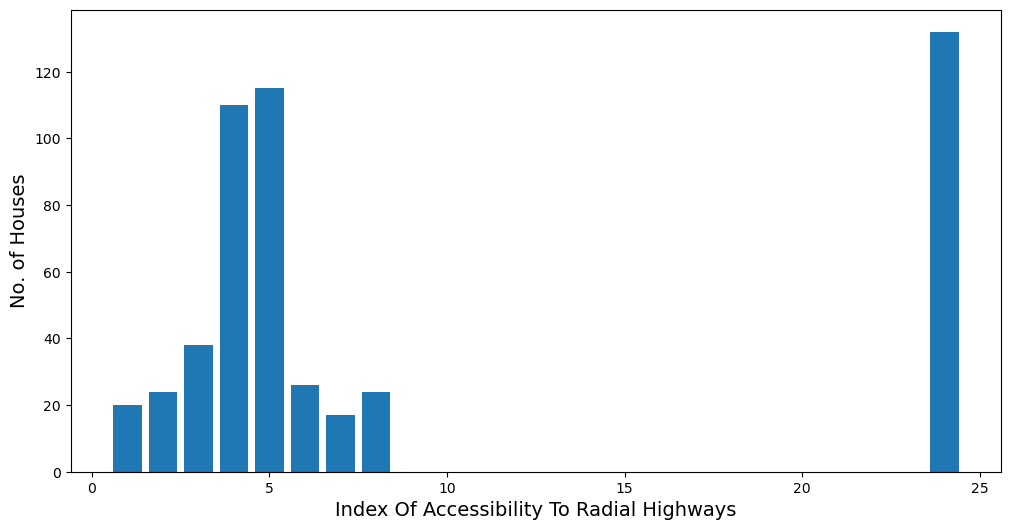

In [17]:
rad_frequency = data['RAD'].value_counts()

plt.figure(figsize=(12,6))
plt.bar(rad_frequency.index, height=rad_frequency)
plt.xlabel("Index Of Accessibility To Radial Highways",  fontsize=14)
plt.ylabel("No. of Houses",  fontsize=14)
plt.show()

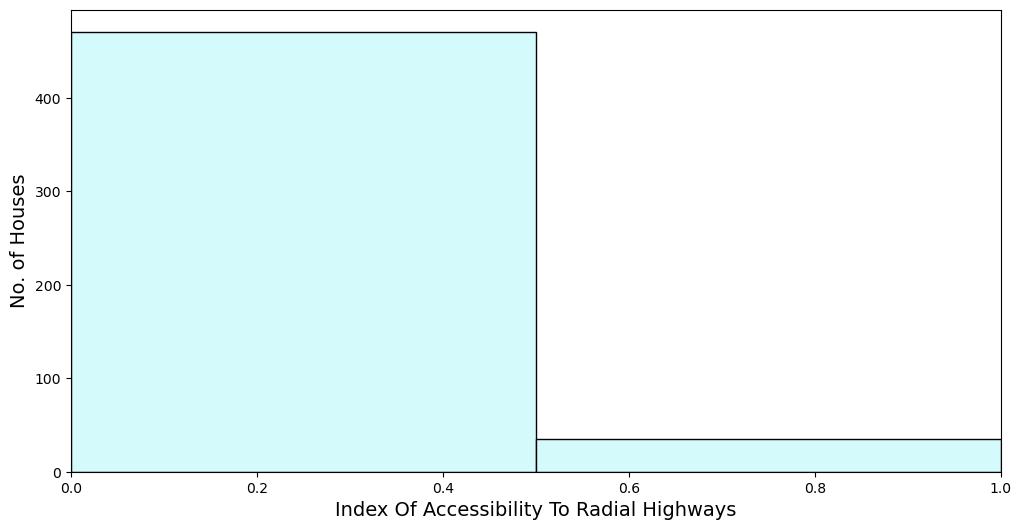

In [18]:
plt.figure(figsize=(12,6))
plt.hist(data['CHAS'],  bins=2, color='#D4FAFC', ec='black')
plt.xlim(0,1)
plt.ylim(0)
plt.xlabel("Index Of Accessibility To Radial Highways",  fontsize=14)
plt.ylabel("No. of Houses",  fontsize=14)
plt.show()

## Correlation

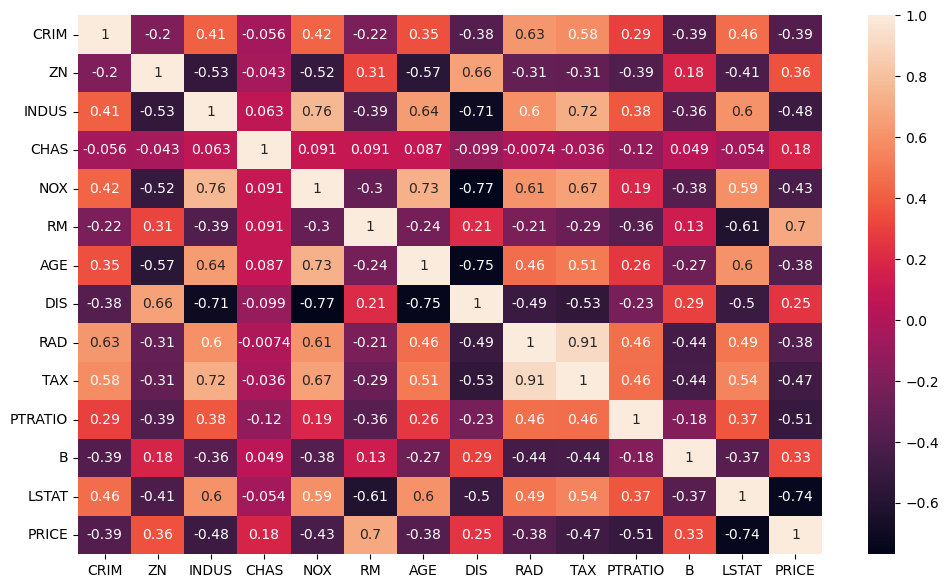

In [20]:
data_corr = data.corr()
plt.figure(figsize=(12,7))
sns.heatmap(data_corr,annot=True);

In [21]:
mask = np.zeros_like(data_corr)
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

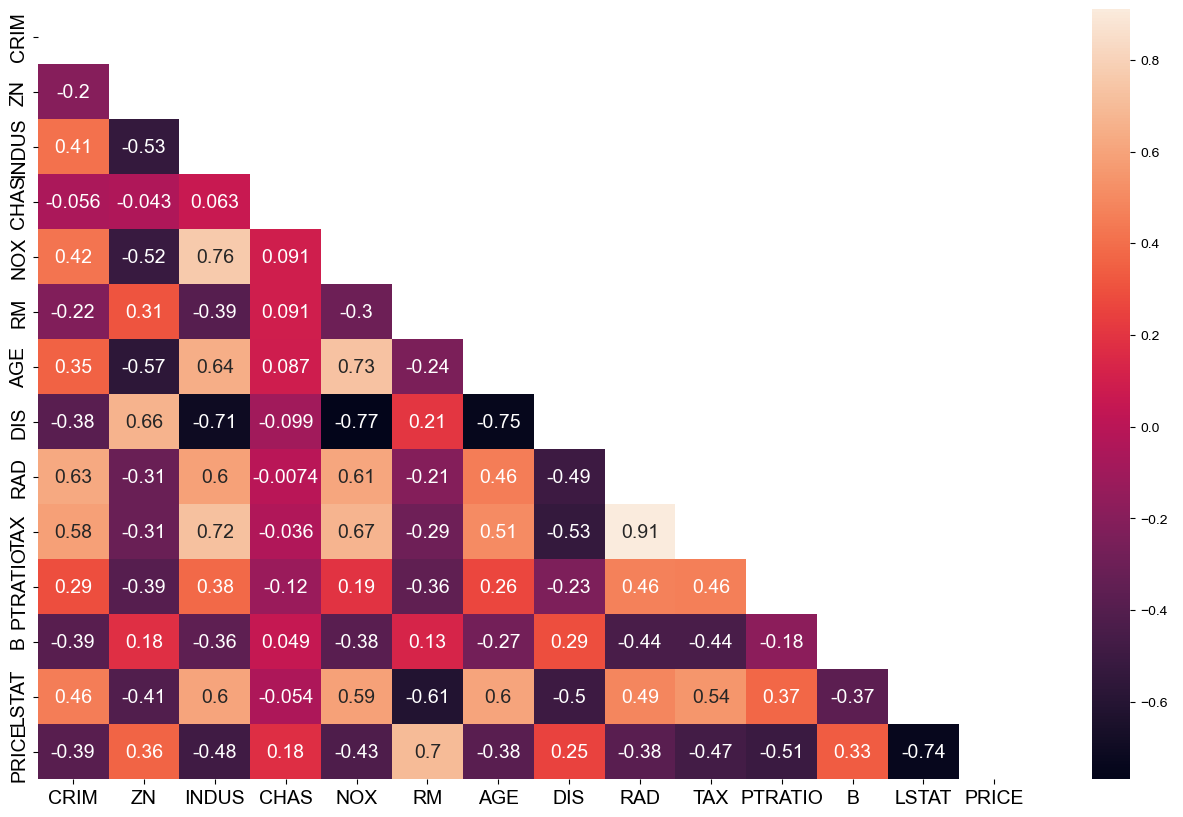

In [22]:
plt.figure(figsize=(16,10))
sns.heatmap(data_corr, mask=mask, annot=True, annot_kws={"size":14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

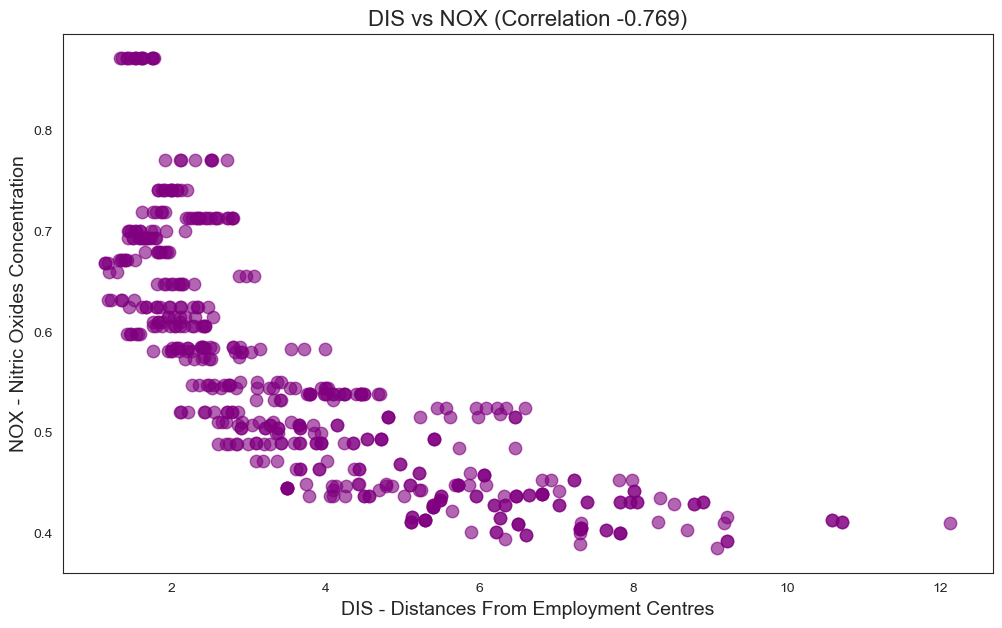

In [23]:
nox_dis_corr = round(data['NOX'].corr(data["DIS"]), 3)
                    
plt.figure(figsize=(12,7))
plt.scatter(x=data['DIS'], y=data['NOX'], alpha = 0.6, s=80, color='purple')
                    
plt.xlabel("DIS - Distances From Employment Centres",  fontsize=14)
plt.ylabel("NOX - Nitric Oxides Concentration",  fontsize=14)
plt.title(f"DIS vs NOX (Correlation {nox_dis_corr})", fontsize=16)
plt.show()

<Figure size 1200x700 with 0 Axes>

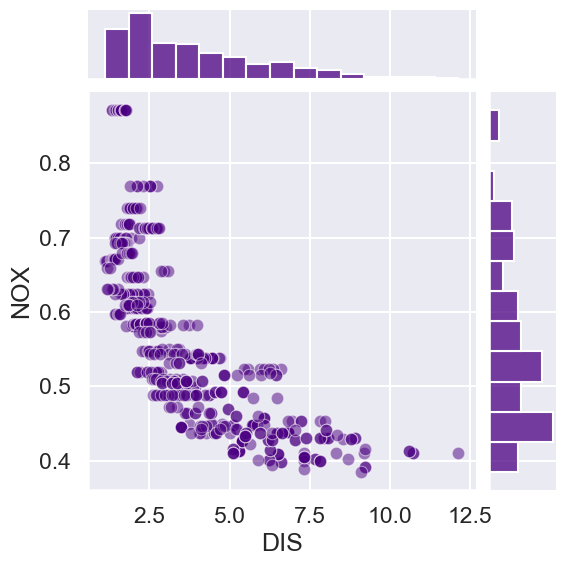

In [24]:
plt.figure(figsize=(12,7))
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], color='indigo', joint_kws={'alpha':0.5})
plt.show()

<Figure size 1200x700 with 0 Axes>

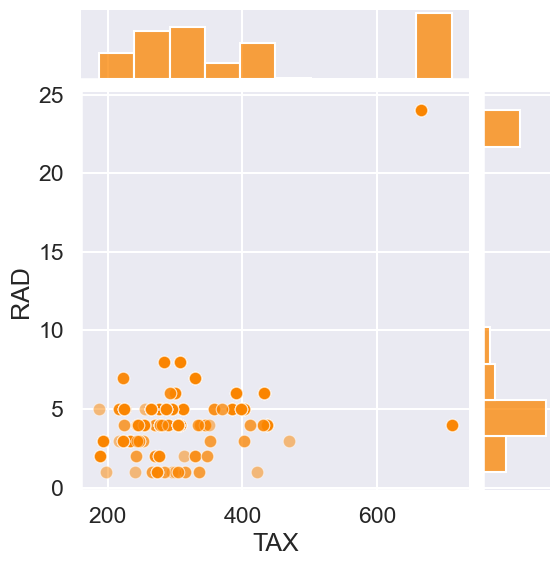

In [25]:
plt.figure(figsize=(12,7))
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
sns.jointplot(y=data['RAD'], x=data['TAX'], color='#fb8500', joint_kws={'alpha':0.5})
plt.show()

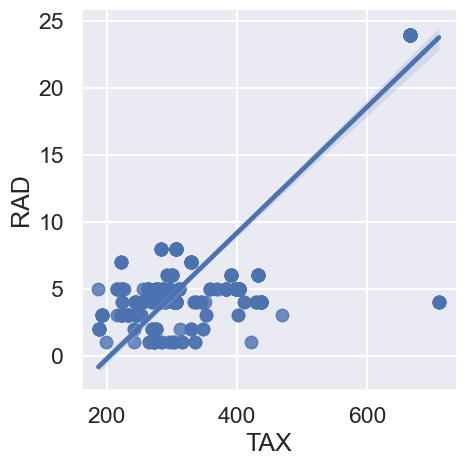

In [26]:
sns.lmplot(x='TAX', y='RAD', data=data)
plt.show()

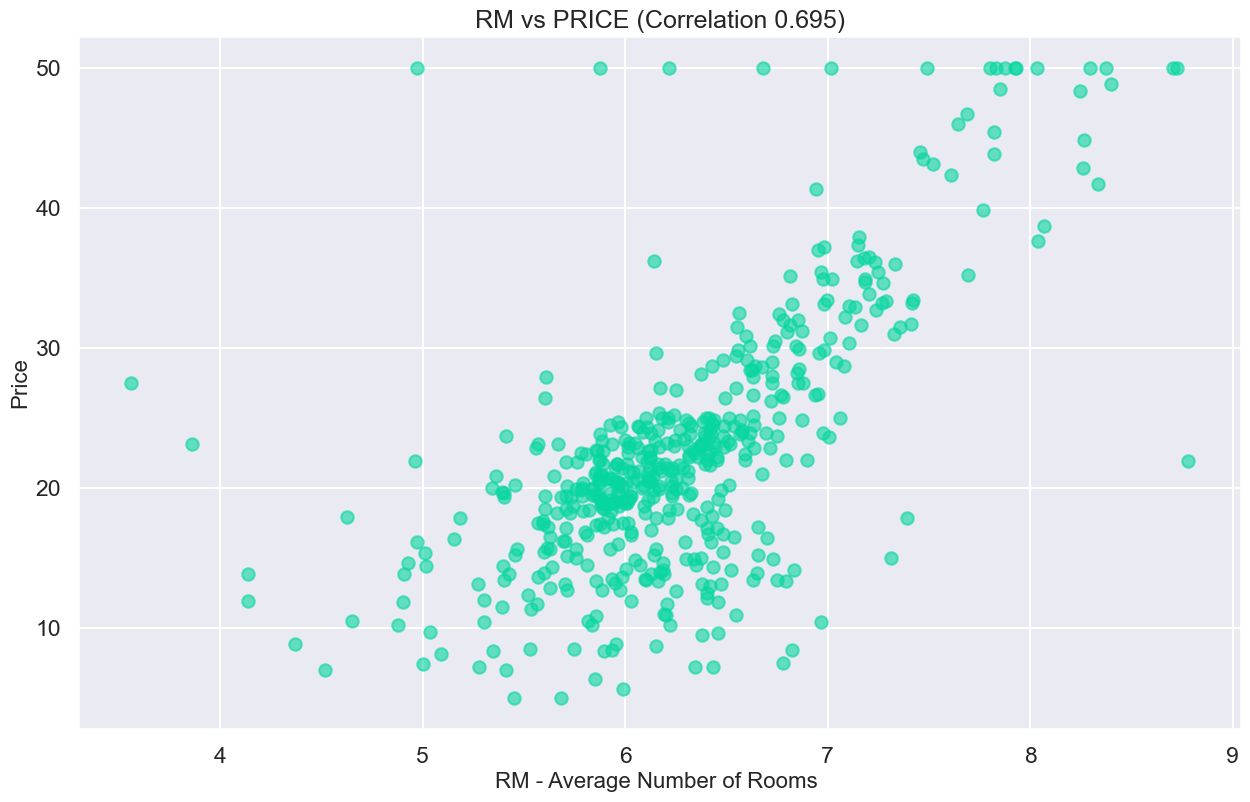

In [48]:
rm_price_corr = round(data['PRICE'].corr(data["RM"]), 3)
                    
plt.figure(figsize=(15,9))
plt.scatter(y=data['PRICE'], x=data['RM'], alpha = 0.6, s=80, color='#06d6a0')
                    
plt.xlabel("RM - Average Number of Rooms ",  fontsize=16)
plt.ylabel("Price",  fontsize=16)
plt.title(f"RM vs PRICE (Correlation {rm_price_corr})", fontsize=18)
plt.show()

<Figure size 1200x700 with 0 Axes>

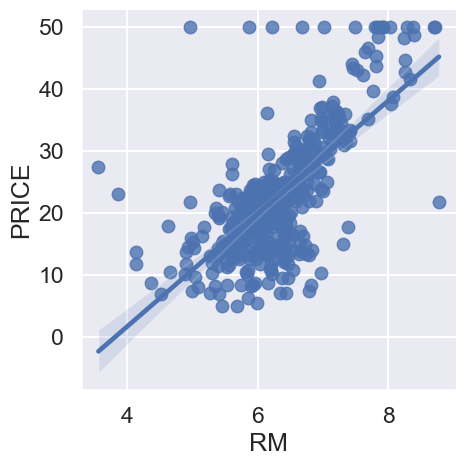

In [54]:
plt.figure(figsize=(12,7))
sns.lmplot(x='RM', y='PRICE', data=data)
plt.show()

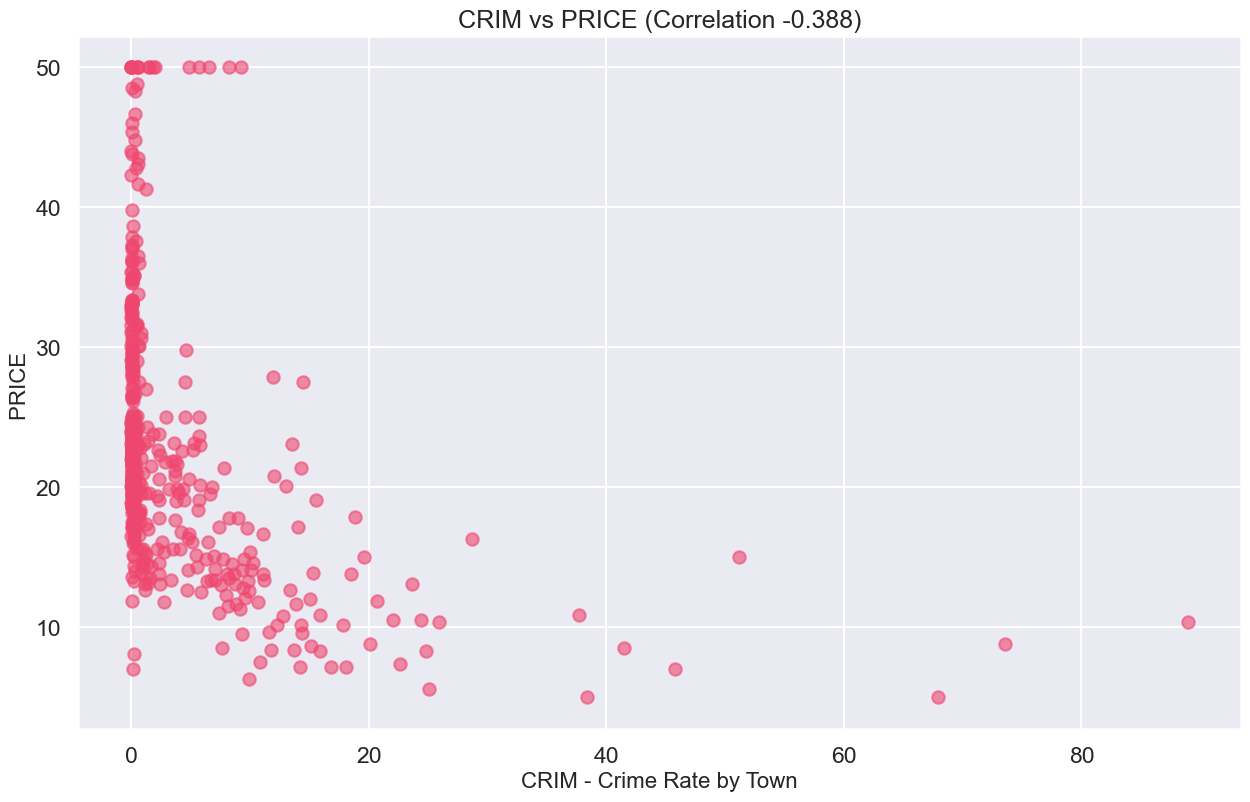

In [49]:
crim_price_corr = round(data['PRICE'].corr(data["CRIM"]), 3)
                    
plt.figure(figsize=(15,9))
plt.scatter(y=data['PRICE'], x=data['CRIM'], alpha = 0.6, s=80, color='#ef476f')
                    
plt.ylabel("PRICE ",  fontsize=16)
plt.xlabel("CRIM - Crime Rate by Town",  fontsize=16)
plt.title(f"CRIM vs PRICE (Correlation {crim_price_corr})", fontsize=18)
plt.show()

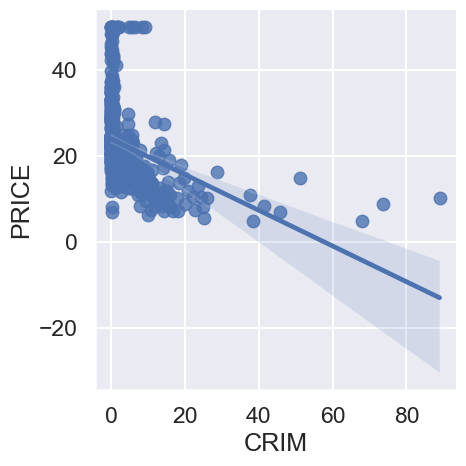

In [52]:
sns.lmplot(x='CRIM', y='PRICE', data=data)
plt.show()

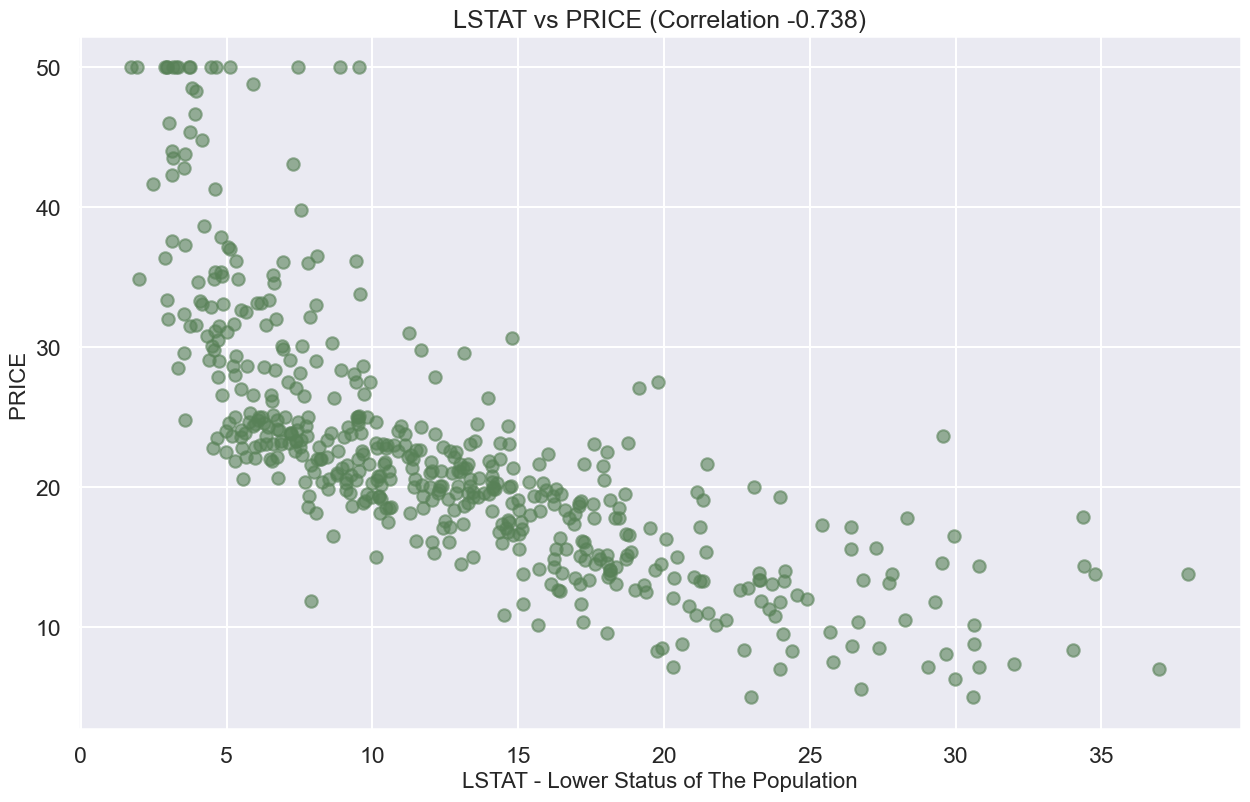

In [50]:
lstat_price_corr = round(data['PRICE'].corr(data["LSTAT"]), 3)
                    
plt.figure(figsize=(15,9))
plt.scatter(y=data['PRICE'], x=data['LSTAT'], alpha = 0.6, s=80, color='#588157')
                    
plt.ylabel("PRICE ",  fontsize=16)
plt.xlabel("LSTAT - % Lower Status of The Population",  fontsize=16)
plt.title(f"LSTAT vs PRICE (Correlation {lstat_price_corr})", fontsize=18)
plt.show()

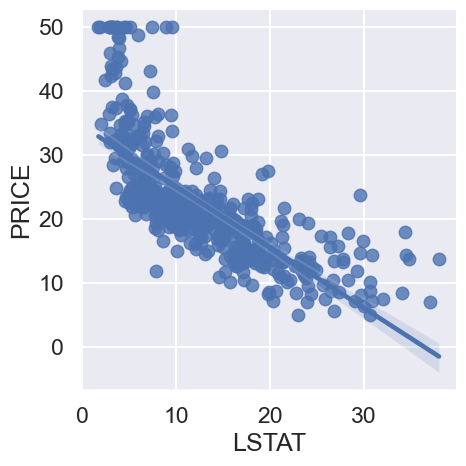

In [53]:
sns.lmplot(x='LSTAT', y='PRICE', data=data)
plt.show()

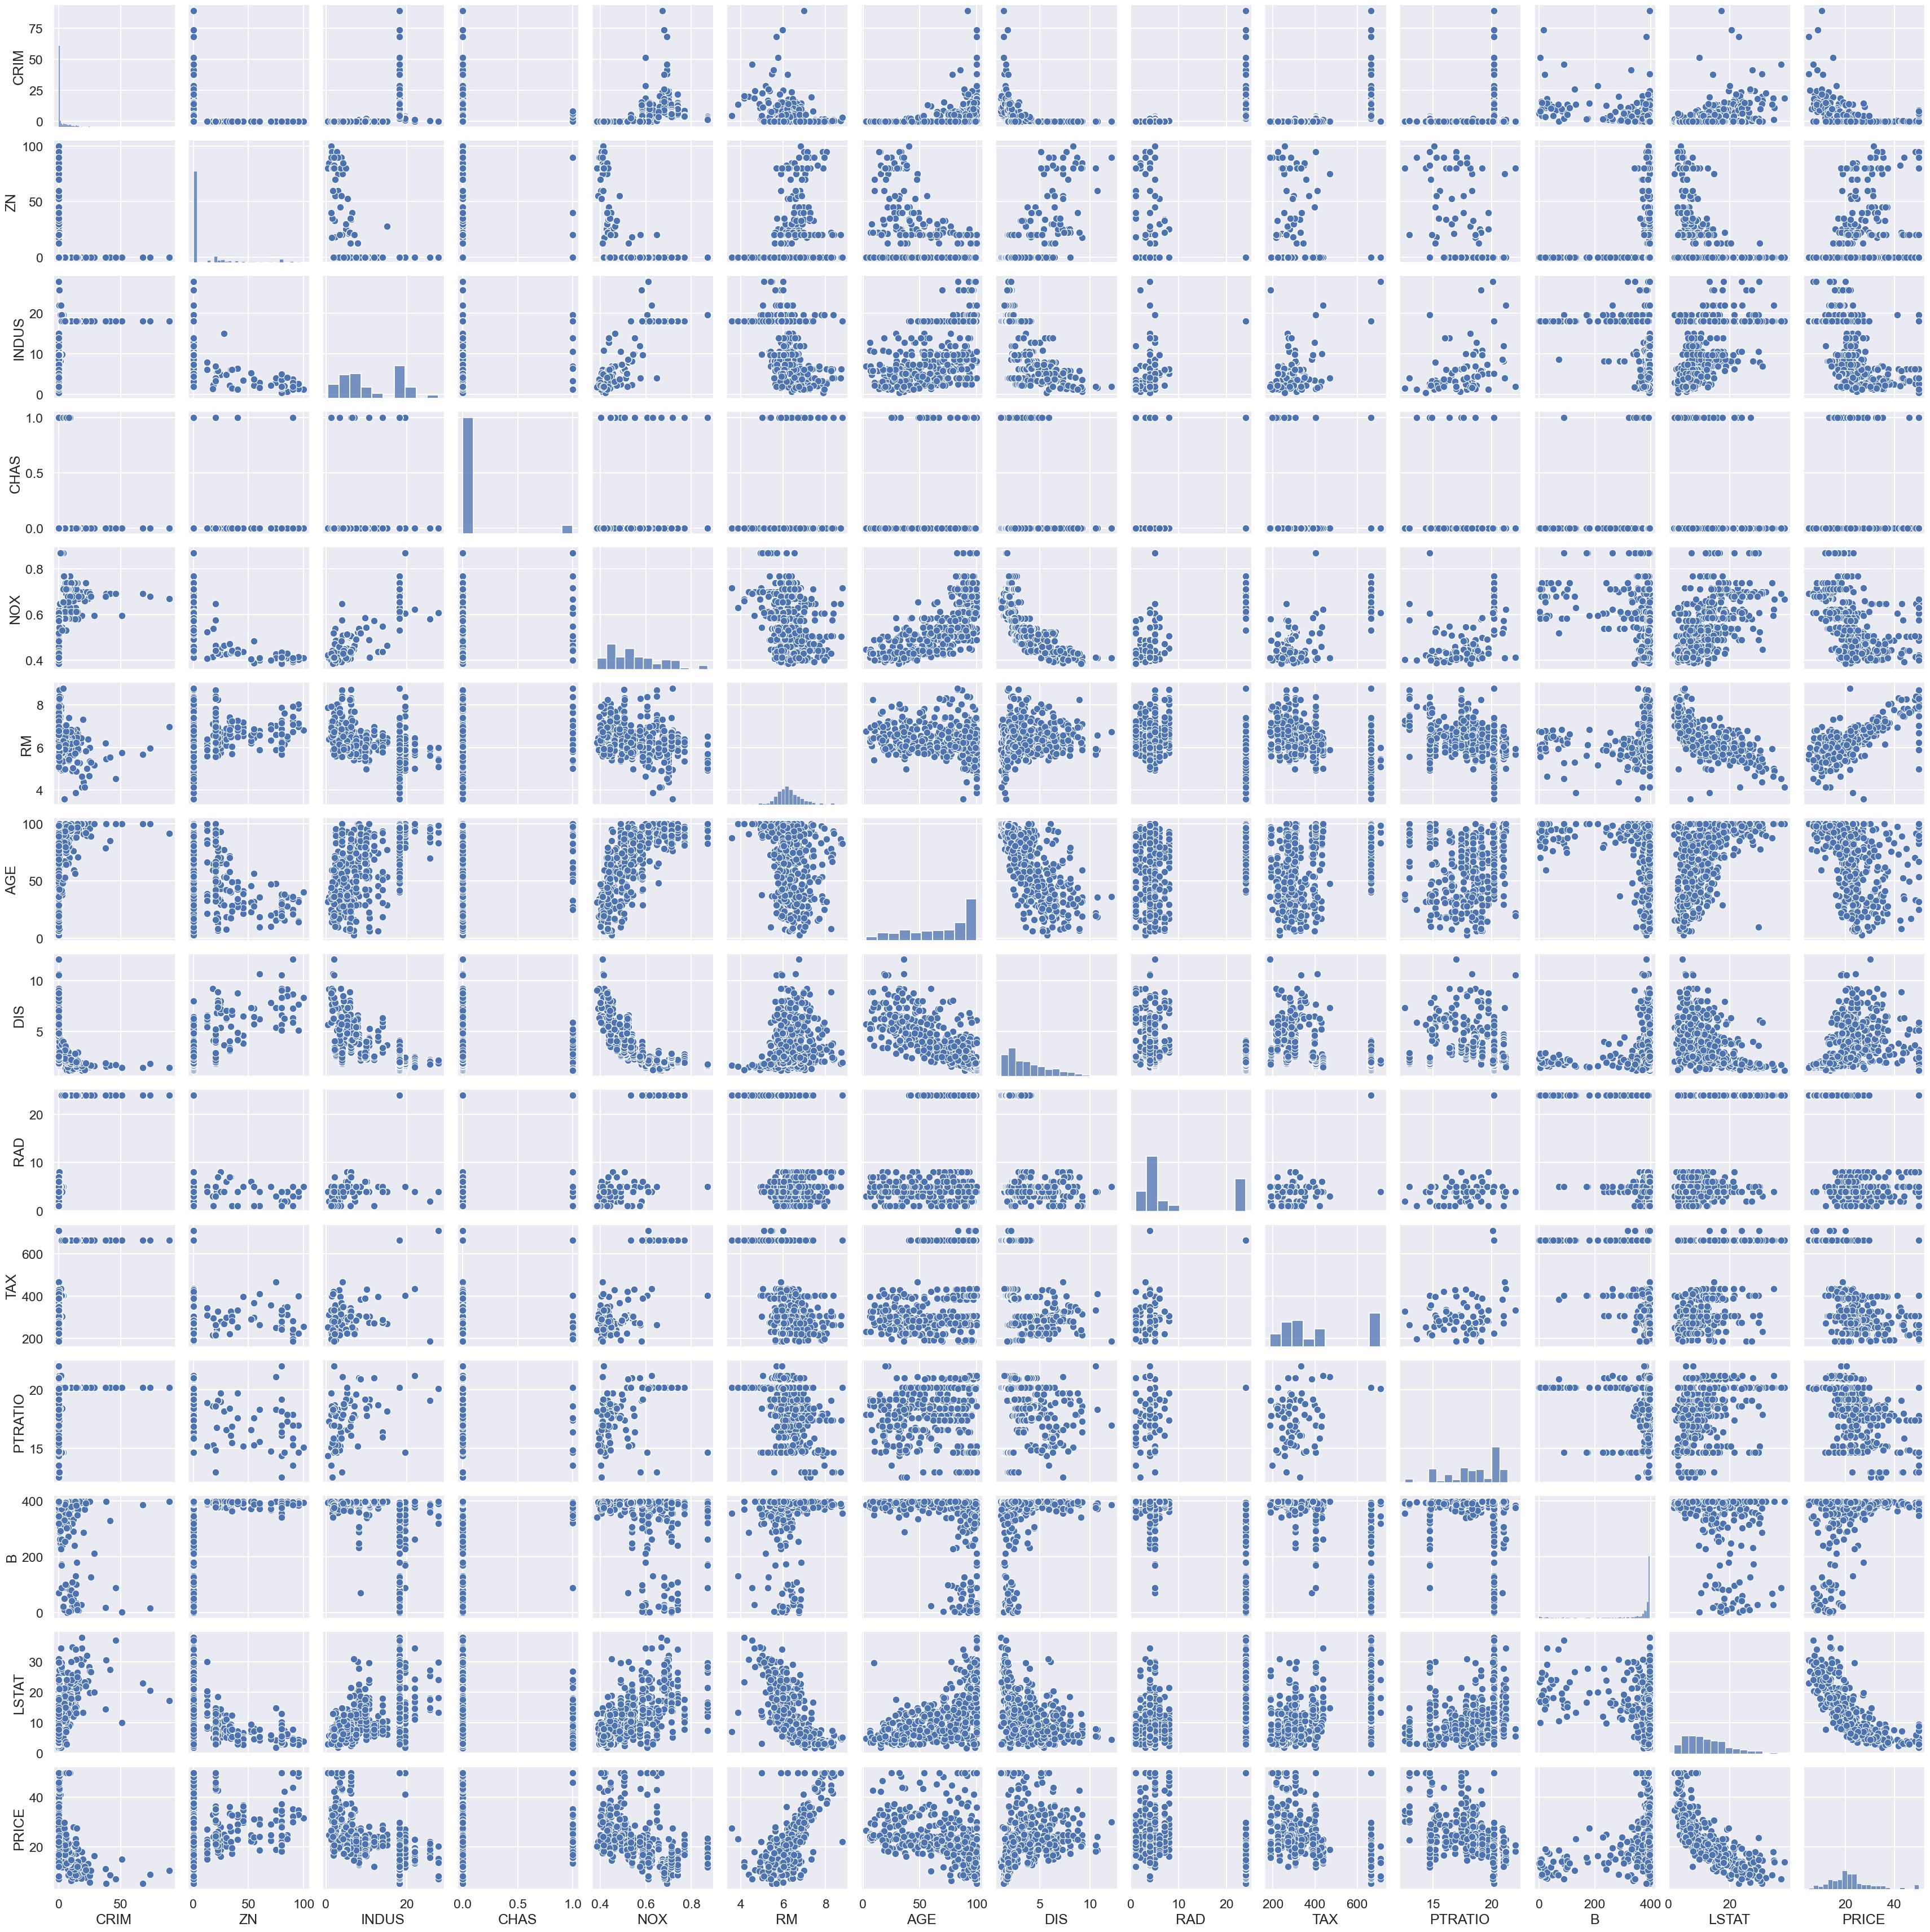

CPU times: total: 21.5 s
Wall time: 41.9 s


In [57]:
%%time

sns.pairplot(data)
plt.show()

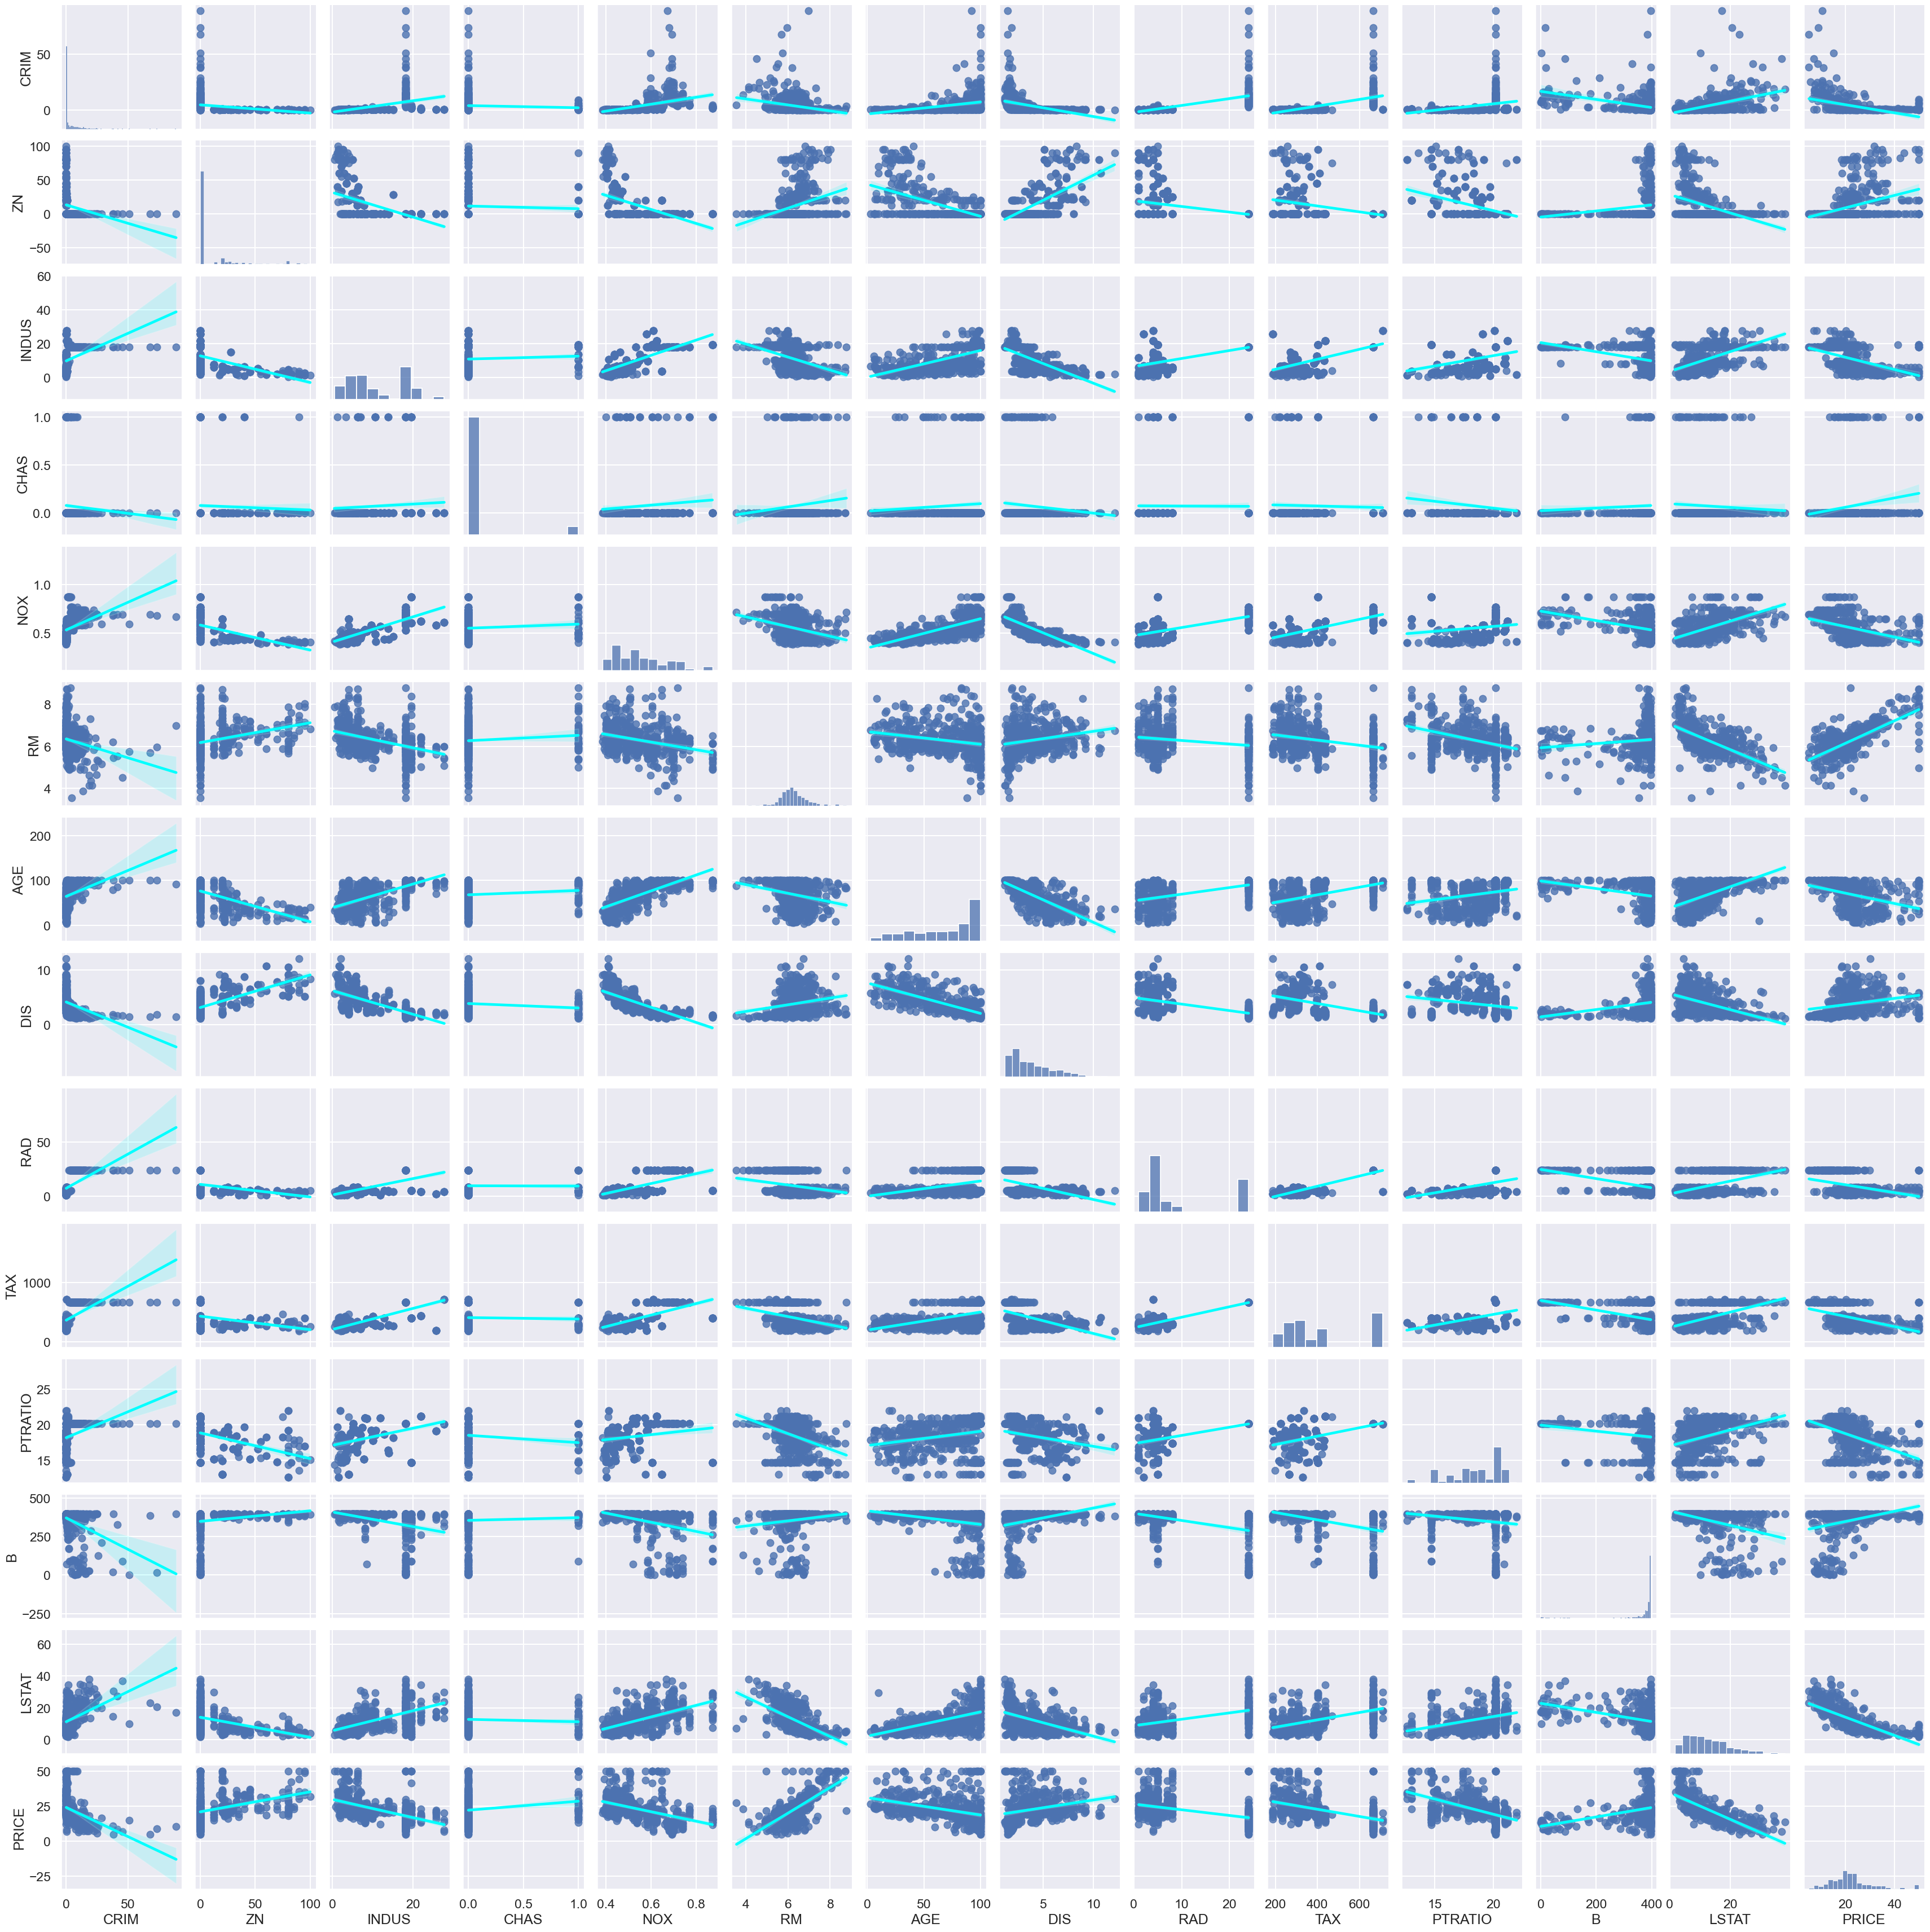

CPU times: total: 1min 13s
Wall time: 1min 11s


In [59]:
%%time

sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

## Training & Test Dataset Split

In [63]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=42)

In [64]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(X_train, y_train)

LinearRegression()

## Linear Model's Metrics

In [72]:
print("Training data r-squared:", ln_reg.score(X_train,y_train))
print('Test data r-squared:', ln_reg.score(X_test, y_test),'\n')
print('Intercept:', ln_reg.intercept_)
pd.DataFrame(data=ln_reg.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.7508856358979673
Test data r-squared: 0.6687594935356332 

Intercept: 30.246750993924053


coef
CRIM     -0.113056
ZN        0.030110
INDUS     0.040381
CHAS      2.784438
NOX     -17.202633
RM        4.438835
AGE      -0.006296
DIS      -1.447865
RAD       0.262430
TAX      -0.010647
PTRATIO  -0.915456
B         0.012351
LSTAT    -0.508571

## Data Transformaations

In [74]:
data['PRICE'].skew()

1.1080984082549072

In [75]:
y_log = np.log(data['PRICE'])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [76]:
y_log.skew()

-0.33032129530987864

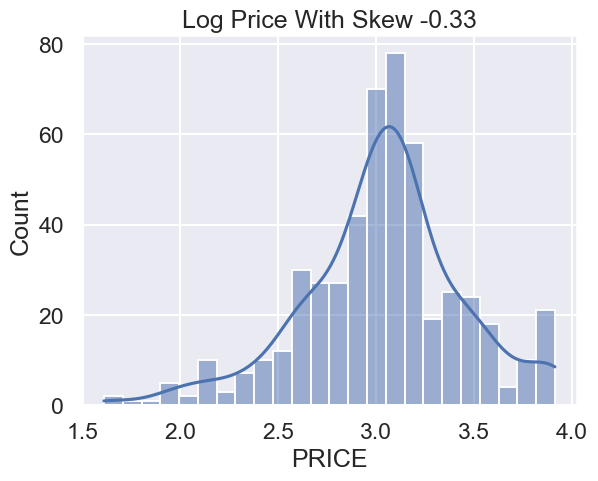

In [82]:
sns.histplot(y_log, kde=True)
plt.title(f'Log Price With Skew {round(y_log.skew(),3)}')
plt.show()

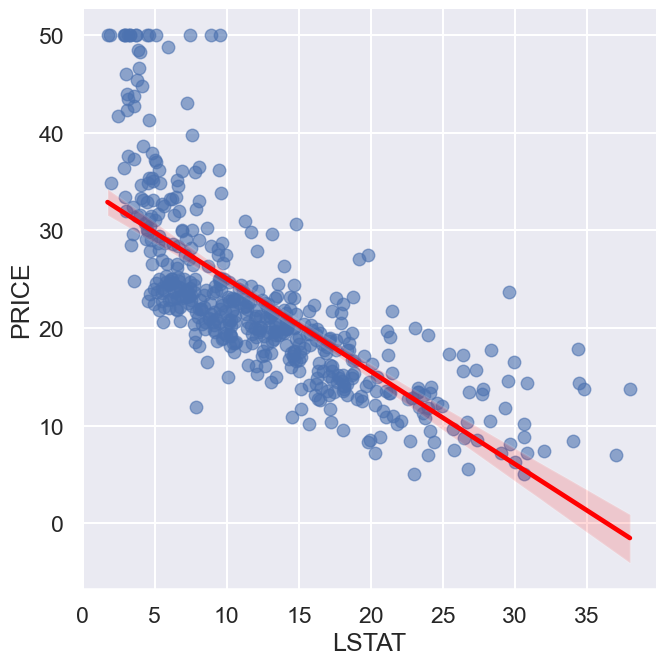

In [84]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, height=7, 
           scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.show()

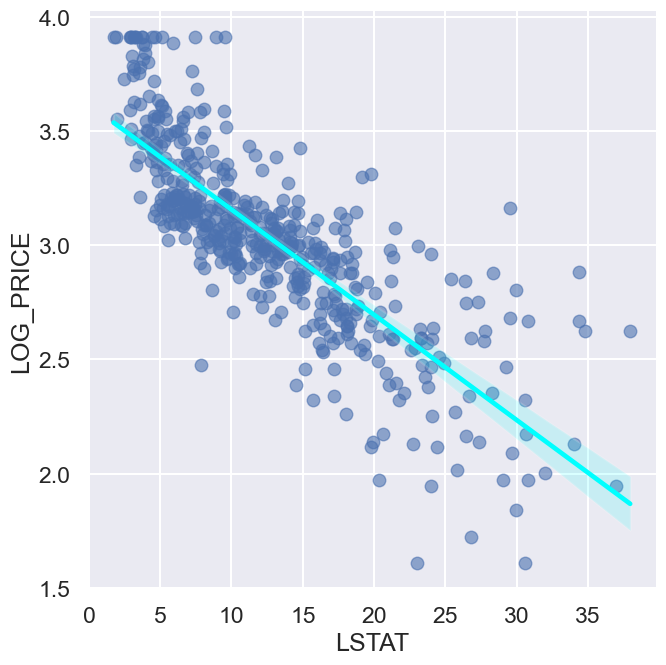

In [85]:
transform_data = features
transform_data['LOG_PRICE'] = y_log
sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transform_data, height=7, 
           scatter_kws={'alpha':0.6}, line_kws={'color':'cyan'})
plt.show()

## Regression Using Log Prices

In [86]:
prices = np.log(data['PRICE']) # using lop prices
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=42)

ln_reg = LinearRegression()
ln_reg.fit(X_train, y_train)

print("Training data r-squared:", ln_reg.score(X_train,y_train))
print('Test data r-squared:', ln_reg.score(X_test, y_test),'\n')
print('Intercept:', ln_reg.intercept_)
pd.DataFrame(data=ln_reg.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.795714923175866
Test data r-squared: 0.7462724975382748 

Intercept: 3.8409203099175726


coef
CRIM    -0.009679
ZN       0.000757
INDUS    0.003057
CHAS     0.096207
NOX     -0.727261
RM       0.113095
AGE     -0.000139
DIS     -0.048944
RAD      0.011139
TAX     -0.000505
PTRATIO -0.036989
B        0.000579
LSTAT   -0.028321

In [87]:
# Charles River Property Premium
log_chas = np.e**0.096207
log_chas

1.1009869447050655